In [626]:
# Imports
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#Data Loading
os.chdir(r"C:\Users\Xime\Documents\VSC")
titanic_data = pd.read_csv('train.csv')



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


End-To-End Classification Pipeline
Clean Pipeline for EDA: Preprocessing, Model selection, Evaluation, Inference

In [627]:
#EDA
# Look at the first rows
print(titanic_data.head())


# Check for missing values
print(titanic_data.isnull().sum())


# Basic statistics
print(titanic_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

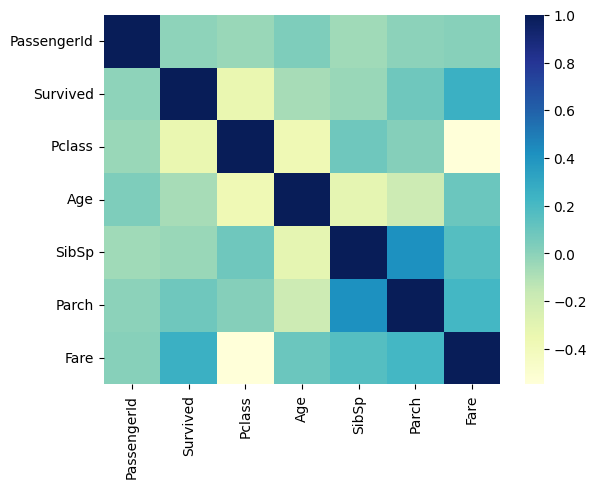

In [628]:
#Visualization examples
# Heatmap correlation
numeric_data = titanic_data.select_dtypes (include=['number'])
sns.heatmap (numeric_data.corr(), cmap="YlGnBu")
plt.show()

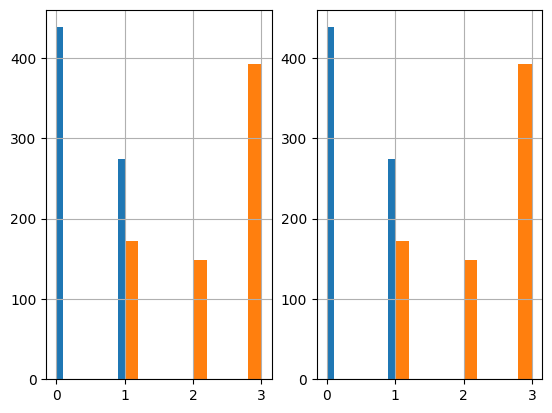

In [629]:
#Subplot
split = StratifiedShuffleSplit (n_splits=1, test_size= 0.2)
for train_indices, test_indices in split.split (titanic_data, titanic_data[["Survived", "Pclass","Sex"]] ):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[train_indices]
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

In [630]:
#Encoding
class AgeImputer(BaseEstimator, TransformerMixin) :
     def fit(self,X, y=None) :
          return self
     def transform(self,X):
          X = X.copy()
          imputer = SimpleImputer(strategy="mean")
          X['Age'] = imputer.fit_transform(X[['Age']])
          return X
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform (self,X):
        encoder = OneHotEncoder(handle_unknown="ignore")
        
 #Embarked encoding
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = [str(c) for c in encoder.categories_[0]]

        for i in range(len(column_names)):
            X[column_names[i]] = matrix.T[i]

#Sex encoding
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Female","Male"]
        for i in range (len(column_names)):
            X[column_names[i]] = matrix.T[i]
        return X

In [631]:
#Feature Dropper
class FeatureDropper (BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop (["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1, errors="ignore")
    
#Pipeline
pipeline = Pipeline ([
        ("ageimputer", AgeImputer()),
        ("featureencoder", FeatureEncoder()),
        ("featuredropper", FeatureDropper())
        ]) 
strat_train_set = pipeline.fit_transform(strat_train_set)
strat_train_set
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 570 to 206
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   Q            712 non-null    float64
 9   S            712 non-null    float64
 10  nan          712 non-null    float64
 11  Female       712 non-null    float64
 12  Male         712 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 77.9 KB


In [632]:
#Fearure Selection
X = strat_train_set.drop (['Survived'], axis=1)
Y = strat_train_set['Survived']

scaler = StandardScaler ()
X.columns = X.columns.astype(str)
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()
X_data


array([[ 4.71029173e-01, -3.70196244e-01,  2.44298001e+00, ...,
        -3.75029300e-02, -7.35612358e-01,  7.35612358e-01],
       [ 5.17846605e-01, -3.70196244e-01,  1.83870938e+00, ...,
        -3.75029300e-02, -7.35612358e-01,  7.35612358e-01],
       [ 1.12647322e+00,  8.27893418e-01, -2.68350065e-16, ...,
        -3.75029300e-02, -7.35612358e-01,  7.35612358e-01],
       ...,
       [-4.38009295e-01, -1.56828591e+00,  8.56769612e-01, ...,
        -3.75029300e-02,  1.35941164e+00, -1.35941164e+00],
       [-9.45198139e-01,  8.27893418e-01, -2.76237814e-01, ...,
        -3.75029300e-02, -7.35612358e-01,  7.35612358e-01],
       [-9.49099592e-01,  8.27893418e-01,  1.76965156e-01, ...,
        -3.75029300e-02, -7.35612358e-01,  7.35612358e-01]])

In [633]:
#Model selection
clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100,200,500], 
     "max_depth": [None,5,10],
     "min_samples_split":[2,3,4]}
    ]
grid_search = GridSearchCV(clf,param_gird, 
                           cv=3,
                             scoring="accuracy",
                               return_train_score=True)
grid_search.fit(X_data, Y_data)

,estimator,RandomForestClassifier()
,param_grid,"[{'max_depth': [None, 5, ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [10, 100, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,200


In [634]:
#Select Best Model
final_clf = grid_search.best_estimator_
final_clf

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [635]:
# Preparing Data by Scaling
start_test_set = pipeline.fit_transform(strat_test_set)
X_test = start_test_set.drop(['Survived'], axis=1)
y_test = start_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()
final_clf.score(X_data_test, y_data_test)

0.9719101123595506

In [636]:
#Applying Preprocessing Pipeline on Dataset
final_data = pipeline.fit_transform(titanic_data)
final_data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,nan,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,0.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,0.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,0.0,1.0


In [637]:
#Final Dataset setup
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [638]:
#Hyperparameter, Random Forest using Grid Search
prod_clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100,200,500], "max_depth": [None,5,10], "min_samples_split":[2,3,4]}
    ]
grid_search = GridSearchCV(prod_clf,param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)


,estimator,RandomForestClassifier()
,param_grid,"[{'max_depth': [None, 5, ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [10, 100, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


In [639]:
#Select Best Model and Preprocess Test Dataset
prod_final_clf = grid_search.best_estimator_
titanic_test_data = pd.read_csv("test.csv")
final_test_data = pipeline.transform(titanic_test_data)

c:\Users\Xime\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [640]:
# Fit the scaler on training data
scaler = StandardScaler()
X_data = scaler.fit_transform(X)

# Transform the test data with the SAME scaler
X_final_test = final_test_data.copy()

X_final_test = X_final_test.reindex(columns=training_feature_names, fill_value=0)

X_data_final_test = scaler.transform(X_final_test)

# Predict
predictions = prod_final_clf.predict(X_data_final_test)




In [641]:
## Prepare Submission File with Predictions
final_df = pd.DataFrame(titanic_test_data['PassengerId'])  # Correct spelling
final_df['Survived'] = predictions
final_df.to_csv("submission.csv", index=False)


In [642]:
final_df
# Save to CSV 
final_df.to_csv("submission.csv", index=False)

print("✅ CSV file saved as submission.csv")


✅ CSV file saved as submission.csv
